In [1]:
#download the folder
import gdown
gdown.download_folder("https://drive.google.com/drive/folders/1FB7bfL103cbIIlFywqvHoPYy5kEN8SGn")

Retrieving folder contents


Processing file 1EnZPvjHFiwvuBZ9ccFvDSNE5rz9LsTFF lena_colour.jpg
Processing file 1uRzfqkhSqIVRLkgdALZ1QF5xOJEw_z1F Lena-bw.png
Processing file 1YFCoWK2u-jeytfJunFReOK8pwa4PUPQy liver.jpg
Processing file 1VCAL8sO98C9aE_0qHRgseFuocCt23i3P MRI_heart_4CB.jpg
Processing file 1swYtC36pshXV5K6jr9zsOpoheSj0-wio MRI_heart_SAX.jpg
Processing file 19oXgZl7YtyOY-ckREdd-tDdtGbUs32yV X-ray.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1EnZPvjHFiwvuBZ9ccFvDSNE5rz9LsTFF
To: /content/sample images/lena_colour.jpg
100%|██████████| 370k/370k [00:00<00:00, 29.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uRzfqkhSqIVRLkgdALZ1QF5xOJEw_z1F
To: /content/sample images/Lena-bw.png
100%|██████████| 190k/190k [00:00<00:00, 16.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YFCoWK2u-jeytfJunFReOK8pwa4PUPQy
To: /content/sample images/liver.jpg
100%|██████████| 11.5k/11.5k [00:00<00:00, 21.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VCAL8sO98C9aE_0qHRgseFuocCt23i3P
To: /content/sample images/MRI_heart_4CB.jpg
100%|██████████| 11.7k/11.7k [00:00<00:00, 7.16MB/s]
Downloading...
From: https://drive.google.com/uc?id=1swYtC36pshXV5K6jr9zsOpoheSj0-wio
To: /content/sample images/MRI_heart_SAX.jpg
100%|██████████| 13.3k/13.3k [00:00<00:00, 24.5M

['/content/sample images/lena_colour.jpg',
 '/content/sample images/Lena-bw.png',
 '/content/sample images/liver.jpg',
 '/content/sample images/MRI_heart_4CB.jpg',
 '/content/sample images/MRI_heart_SAX.jpg',
 '/content/sample images/X-ray.jpg']

In [2]:
#import
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def region_growing(image, seed, threshold):
    height, width = image.shape #image size
    segmented = np.zeros_like(image, dtype=np.uint8) #output image with same size, initialized to 0
    seed_x, seed_y = seed #initial seed point
    seed_value = image[seed_y, seed_x] #seed point in image

    #for 8 neighbours
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)] #neighbours

    #keep the seed point in stack
    stack = [(seed_x, seed_y)]

    #visit the points in stack
    while stack:
        x, y = stack.pop() #pop operation LIFO

        if segmented[y, x] == 0:  # Not visited
            segmented[y, x] = 255 # Mark as part of the region

            #check the neighbours
            for dx, dy in neighbors:
                #new points
                nx, ny = x + dx, y + dy

                #point is inside the image region
                if 0 <= nx < width and 0 <= ny < height:
                    #check if the difference is less than threshold

                    if segmented[ny, nx] == 0 and abs(int(image[ny, nx]) - int(seed_value)) < threshold:
                        #append the new points
                        stack.append((nx, ny))
    return segmented

In [4]:
# Load a image
def process_example(image_path, seed, threshold):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #read an image
    segmented = region_growing(image, seed, threshold)#get the result from region growing algorithm

    plt.figure(figsize=(10, 5)) #plot size

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.scatter(*seed[::-1], color='red', s=50, label='Seed')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='gray')
    plt.title("Region Grown Segmentation")

    plt.show()
    return segmented

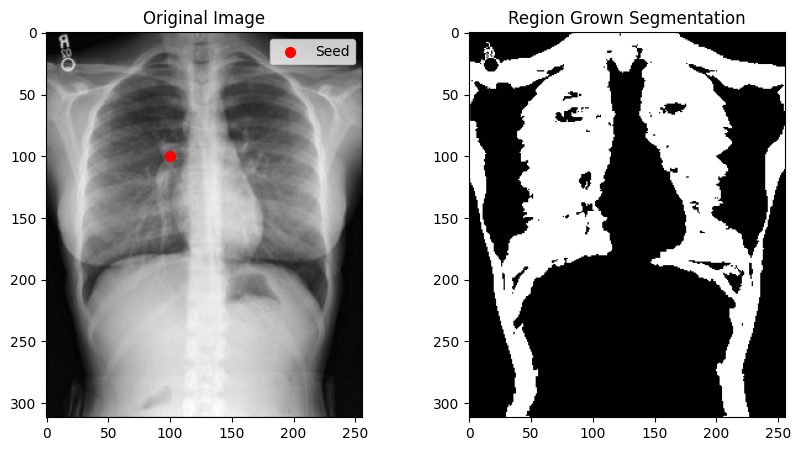

In [5]:
a = process_example("/content/sample images/X-ray.jpg", seed=(100, 100), threshold=40)

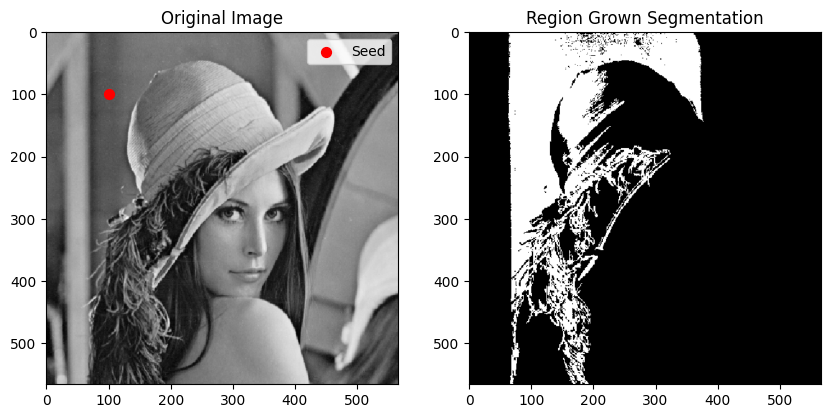

In [6]:
b = process_example("/content/sample images/Lena-bw.png", seed=(100, 100), threshold=40)

#Effect of Initial Seed Point

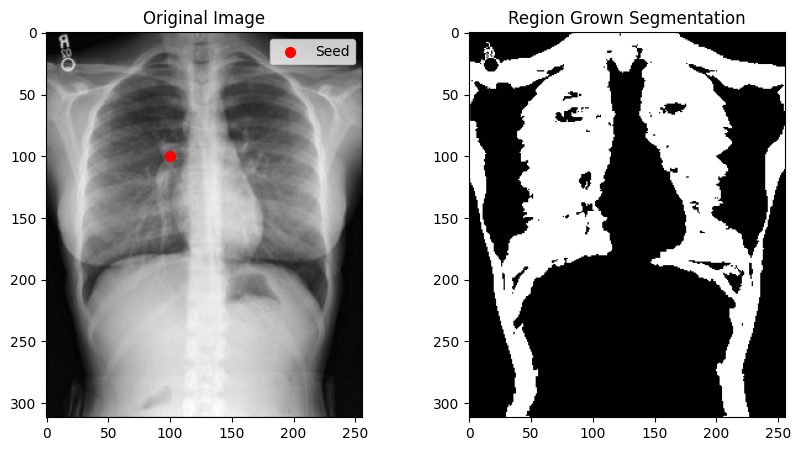

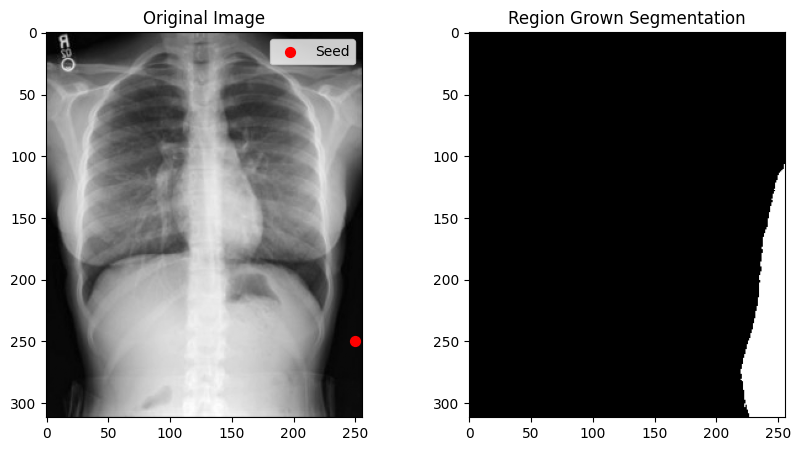

In [7]:
image = cv2.imread("/content/sample images/X-ray.jpg", cv2.IMREAD_GRAYSCALE)
c = process_example("/content/sample images/X-ray.jpg", seed=(100, 100), threshold=40)
d = process_example("/content/sample images/X-ray.jpg", seed=(250, 250), threshold=40)

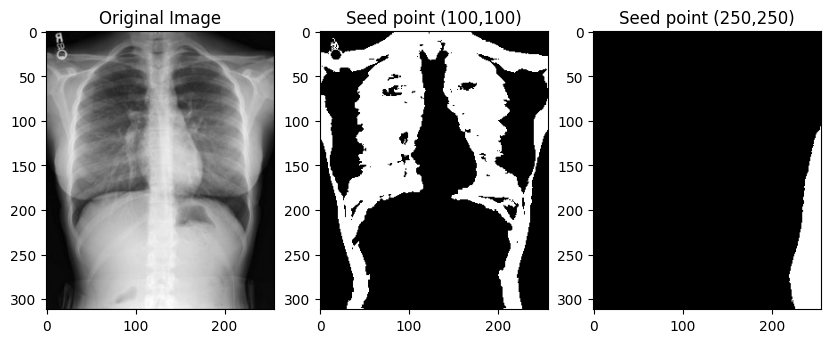

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(c, cmap='gray')
plt.title("Seed point (100,100)")

plt.subplot(1, 3, 3)
plt.imshow(d, cmap='gray')
plt.title("Seed point (250,250)")

plt.show()

Mean Shift Algorithm

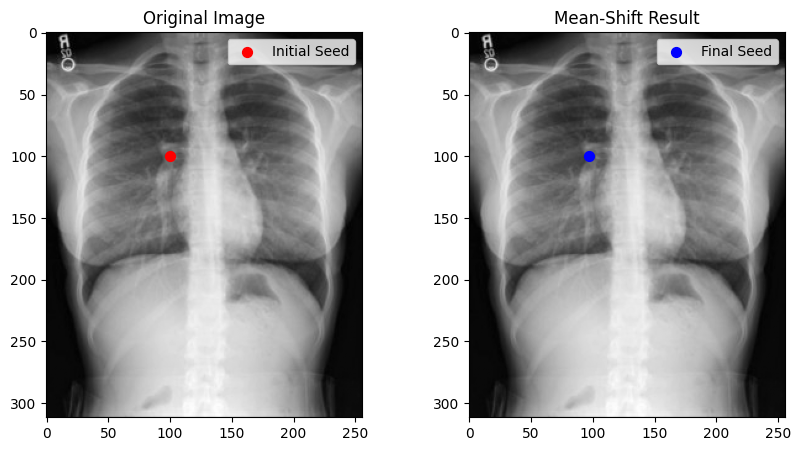

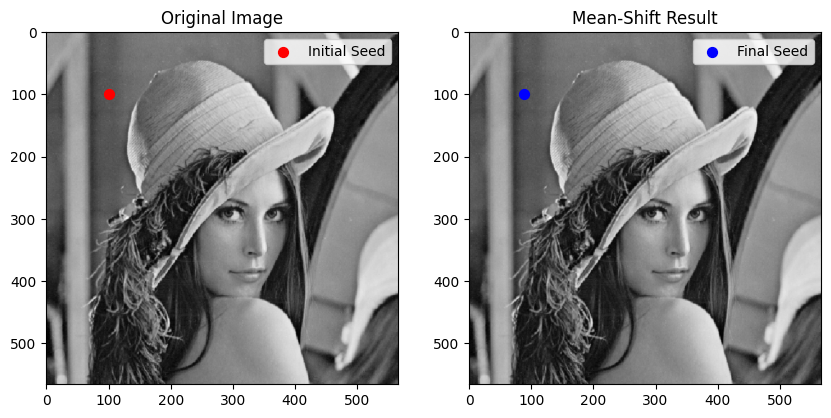

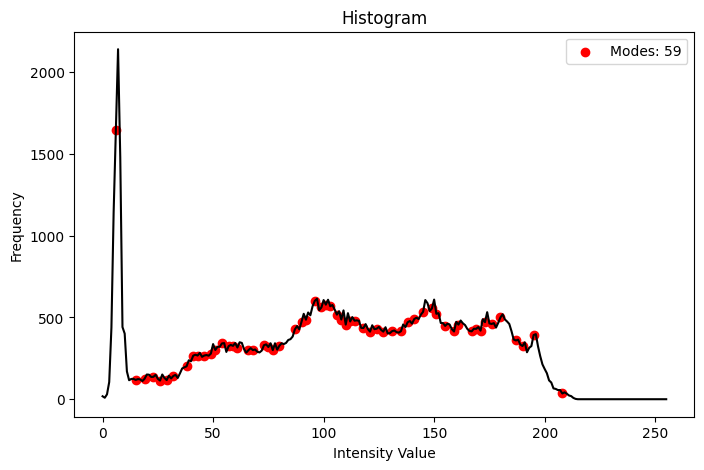

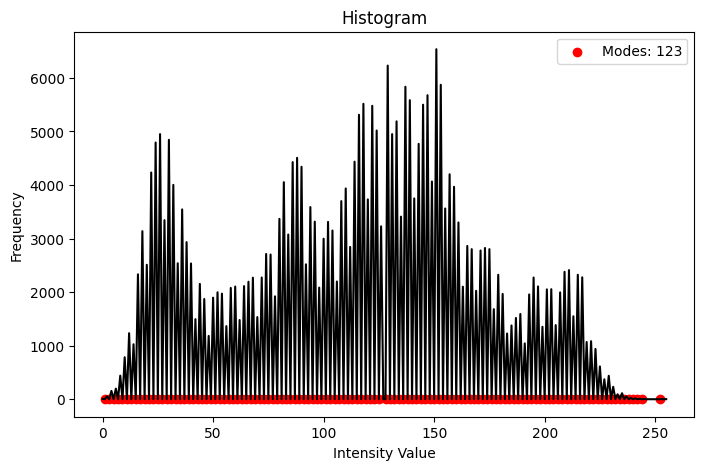

Modes found in X-ray image: 59
Modes found in Lena image: 123


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def mean_shift(image, seed, window_size=20, max_iterations=50, epsilon=1):
    """Implements the Mean-Shift algorithm for image segmentation."""
    height, width = image.shape  # Get image dimensions
    x, y = seed  # Initialize seed point

    for i in range(max_iterations):
        x_min = max(x - window_size // 2, 0)
        x_max = min(x + window_size // 2, width - 1)
        y_min = max(y - window_size // 2, 0)
        y_max = min(y + window_size // 2, height - 1)

        # Extract the window region
        window = image[y_min:y_max+1, x_min:x_max+1]

        # Compute weighted mean (center of gravity)
        X, Y = np.meshgrid(np.arange(x_min, x_max+1), np.arange(y_min, y_max+1))
        weights = window.astype(float)
        total_weight = np.sum(weights)

        new_x = int(np.sum(X * weights) / total_weight)
        new_y = int(np.sum(Y * weights) / total_weight)

        # Check for convergence
        if abs(new_x - x) < epsilon and abs(new_y - y) < epsilon:
            break

        x, y = new_x, new_y  # Update seed position

    return (x, y)

# Function to process images and display results
def process_mean_shift(image_path, seed):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    final_seed = mean_shift(image, seed)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.scatter(*seed[::-1], color='red', s=50, label='Initial Seed')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.title("Mean-Shift Result")
    plt.scatter(*final_seed[::-1], color='blue', s=50, label='Final Seed')
    plt.legend()
    plt.show()

    return final_seed

# Apply mean shift on the two images
seed_xray = process_mean_shift("/content/sample images/X-ray.jpg", seed=(100, 100))
seed_lena = process_mean_shift("/content/sample images/Lena-bw.png", seed=(100, 100))

# Plot histograms and detect modes
def plot_histogram(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    plt.figure(figsize=(8, 5))
    plt.plot(hist, color='black')
    plt.title("Histogram")
    plt.xlabel("Intensity Value")
    plt.ylabel("Frequency")

    # Detect modes (peaks in histogram)
    modes = np.where((hist[1:-1] > hist[:-2]) & (hist[1:-1] > hist[2:]))[0]
    plt.scatter(modes, hist[modes], color='red', label=f'Modes: {len(modes)}')
    plt.legend()
    plt.show()

    return len(modes)

modes_xray = plot_histogram("/content/sample images/X-ray.jpg")
modes_lena = plot_histogram("/content/sample images/Lena-bw.png")

print(f"Modes found in X-ray image: {modes_xray}")
print(f"Modes found in Lena image: {modes_lena}")


In [10]:
import cv2
import matplotlib.pyplot as plt

def mean_shift_segmentation(image, seed, window_size, max_iter=100, epsilon=1e-3):
    h, w = image.shape
    x, y = seed
    trajectory = [(x, y)]  # Store path for visualization

    for _ in range(max_iter):
        x_min, x_max = max(0, x - window_size), min(w, x + window_size)
        y_min, y_max = max(0, y - window_size), min(h, y + window_size)

        window = image[y_min:y_max, x_min:x_max]

        # Compute center of gravity (mean coordinates)
        x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
        total_intensity = np.sum(window)
        if total_intensity == 0:
            break

        new_x = int(np.sum(x_vals * window) / total_intensity)
        new_y = int(np.sum(y_vals * window) / total_intensity)

        # Store trajectory
        trajectory.append((new_x, new_y))

        # Check convergence
        if abs(new_x - x) < epsilon and abs(new_y - y) < epsilon:
            break

        x, y = new_x, new_y

    return trajectory  # Return full path

def plot_histogram(image, title):
    plt.figure(figsize=(6, 4))
    plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title(f"Histogram of {title}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

def process_image(image_path, seed, window_size):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return

    trajectory = mean_shift_segmentation(image, seed, window_size)

    plt.figure(figsize=(12, 5))

    # Original Image with Initial Seed
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.scatter(seed[0], seed[1], color='blue', s=50, label='Initial Seed')
    plt.title("Original Image")
    plt.legend()

    # Segmented Image with Final Position and Trajectory
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.plot(*zip(*trajectory), color='green', linestyle='dashed', linewidth=1.5, label='Trajectory')
    plt.scatter(trajectory[0][0], trajectory[0][1], color='blue', s=50, label='Start')
    plt.scatter(trajectory[-1][0], trajectory[-1][1], color='red', s=50, label='Final Position')
    plt.title("Mean-Shift Segmentation")
    plt.legend()

    plt.show()

    plot_histogram(image, image_path.split('/')[-1])  # Histogram

    return trajectory[-1]  # Return final position

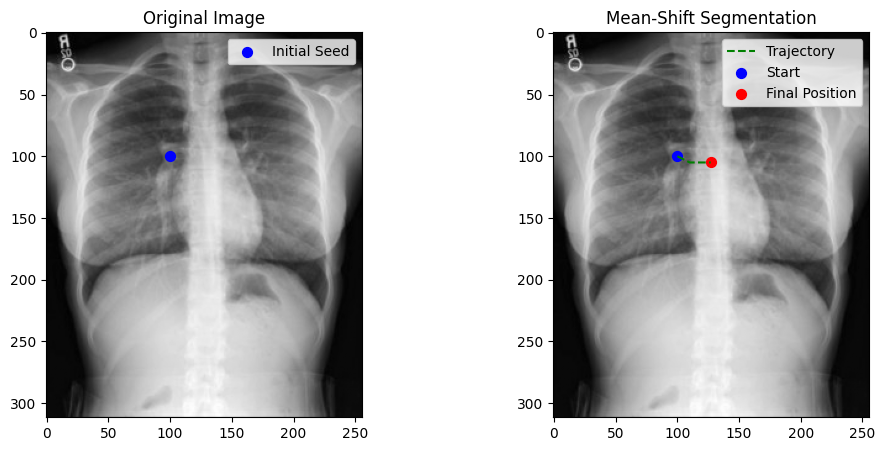

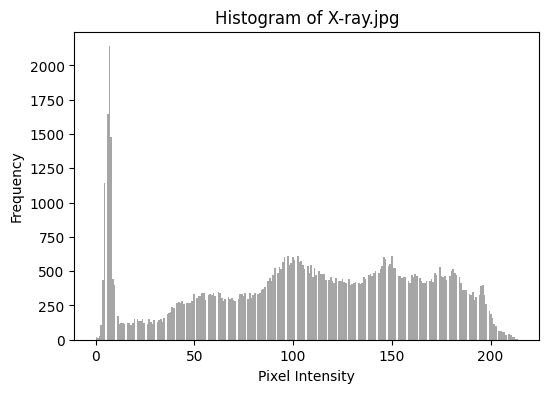

In [11]:
a = process_image("/content/sample images/X-ray.jpg", seed=(100, 100), window_size=20)

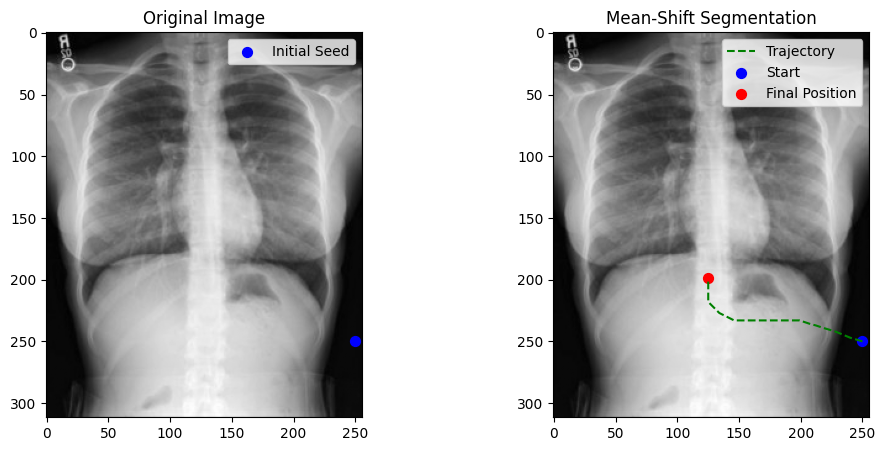

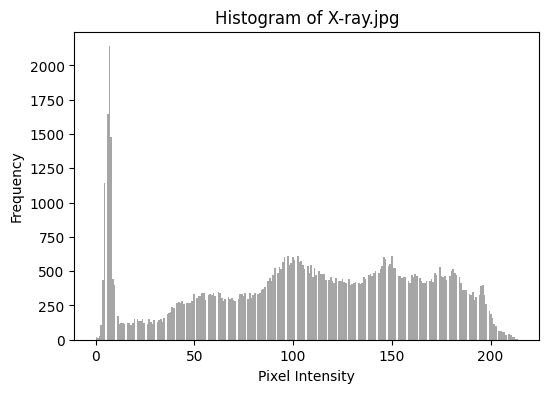

In [12]:
image = cv2.imread("/content/sample images/X-ray.jpg", cv2.IMREAD_GRAYSCALE)
b = process_image("/content/sample images/X-ray.jpg", seed=(250, 250), window_size=20)

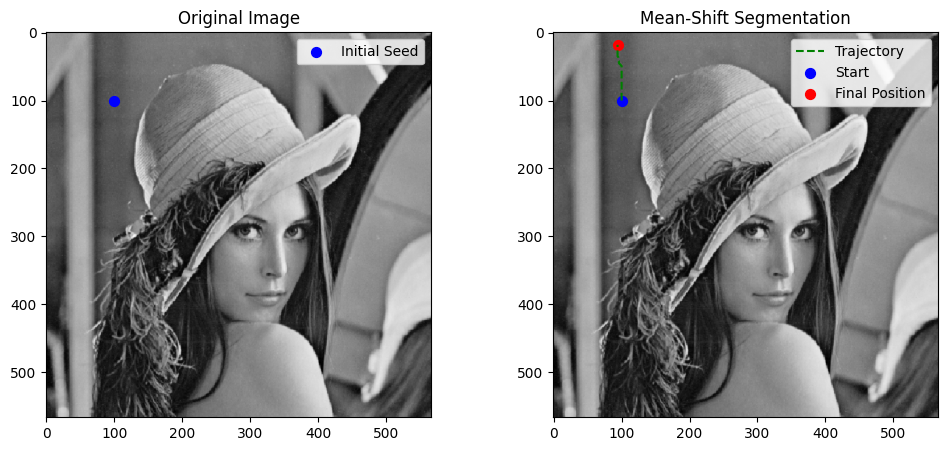

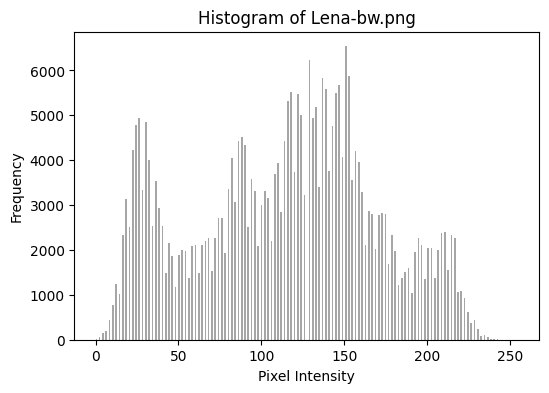

In [13]:
c = process_image("/content/sample images/Lena-bw.png", seed=(100, 100), window_size=20)

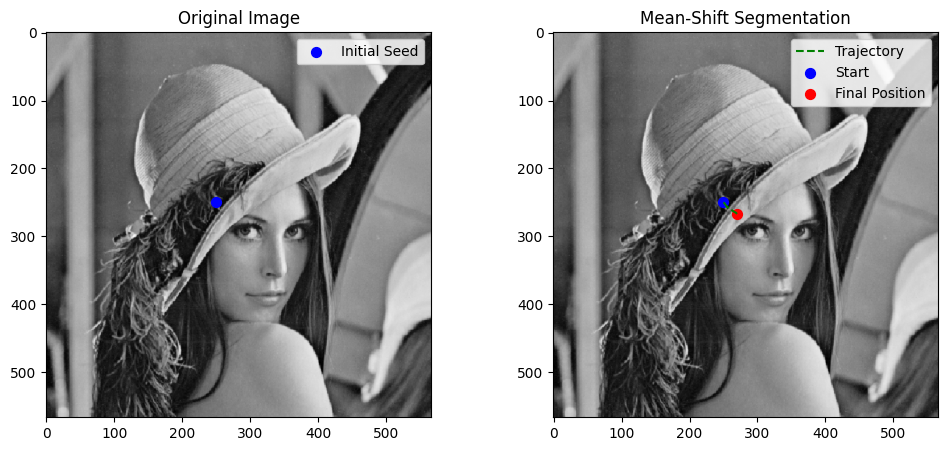

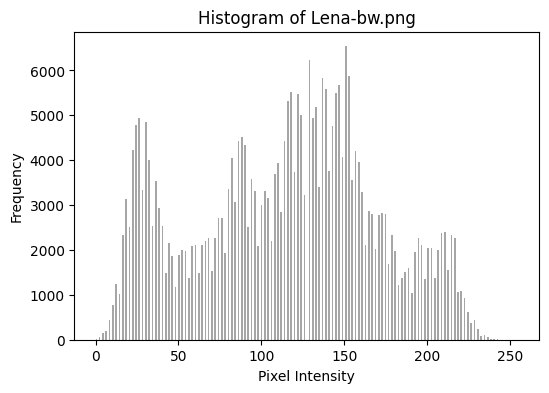

In [14]:
d = process_image("/content/sample images/Lena-bw.png", seed=(250, 250), window_size=20)